# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulana Malik Ibrahim
- **Email:** mc525d5y0599@student.devacademy.id
- **ID Dicoding:** mc525d5y0599

## Menentukan Pertanyaan Bisnis

- Kapan waktu paling ramai dan paling sepi untuk penggunaan sepeda?
- Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
- Apakah ada perbedaan pola peminjaman antara pengguna kasual dan terdaftar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. **`pandas as pd`** → Untuk manipulasi dan analisis data dalam bentuk tabel (DataFrame).  
2. **`matplotlib.pyplot as plt`** → Untuk membuat grafik dan visualisasi data.  
3. **`seaborn as sns`** → Untuk visualisasi data berbasis `matplotlib` dengan tampilan lebih menarik.

## Data Wrangling

### Gathering Data

In [ ]:
file_path = "/content/drive/MyDrive/datasets/hour.csv"
df = pd.read_csv(file_path)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


1. **`file_path`** → Menyimpan lokasi file dataset `hour.csv` di Google Drive.  
2. **`pd.read_csv(file_path)`** → Membaca file CSV dan menyimpannya sebagai DataFrame `df`.  
3. **`df.head()`** → Menampilkan 5 baris pertama dari DataFrame untuk melihat struktur data.

**Insight:**
- Dataset memiliki 17379 baris dan 17 kolom.
- Dataset mencakup data penyewaan sepeda per jam dengan berbagai fitur seperti musim, cuaca, dan jumlah pengguna.

### Assessing Data

In [ ]:
print("\nInformasi Dataset:")
print(df.info())

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nCek Nilai Hilang:")
print(df.isnull().sum())

print("\nCek Duplikasi:")
print(df.duplicated().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Statistik Deskriptif:
 

1. **`df.info()`** → Menampilkan informasi dataset, termasuk jumlah non-null, tipe data, dan jumlah kolom.  
2. **`df.describe()`** → Memberikan ringkasan statistik deskriptif (rata-rata, min, max, dll.).  
3. **`df.isnull().sum()`** → Mengecek jumlah nilai yang hilang di setiap kolom.  
4. **`df.duplicated().sum()`** → Menghitung jumlah baris duplikat dalam dataset.

**Insight:**
- Dataset memiliki 17 kolom dan 17.379 baris.
- Tidak ada nilai yang hilang dalam dataset.
- Tidak ditemukan data duplikat dalam dataset.
- Kolom dteday masih bertipe object (string), sebaiknya dikonversi ke datetime untuk analisis berbasis waktu.
- Kolom season, yr, mnth, hr, weekday, workingday, dan weathersit adalah variabel kategori yang saat ini bertipe integer, sebaiknya dikonversi ke tipe kategori agar lebih mudah dipahami.
- Kolom temp, atemp, hum, dan windspeed memiliki rentang nilai antara 0 hingga 1, yang kemungkinan merupakan data yang sudah dinormalisasi. Jika ingin lebih intuitif, perlu dikonversi ke skala aslinya.
- Kolom cnt adalah jumlah total pengguna sepeda dan merupakan target utama dalam analisis.

### Cleaning Data

In [ ]:
df_cleaned = df.drop_duplicates()

df_cleaned['dteday'] = pd.to_datetime(df_cleaned['dteday'])

df_cleaned = df_cleaned[(df_cleaned['season'].between(1, 4)) & (df_cleaned['weathersit'].between(1, 4))]

df_cleaned['temp'] = df_cleaned['temp'] * 41
df_cleaned['atemp'] = df_cleaned['atemp'] * 50

print("\nDataset setelah pembersihan:")
print(df_cleaned.info())


Dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64       

1. **`df.drop_duplicates()`** → Menghapus baris duplikat dari dataset.  
2. **`pd.to_datetime(df_cleaned['dteday'])`** → Mengubah kolom tanggal (`dteday`) menjadi tipe `datetime`.  
3. **`df_cleaned[(df_cleaned['season'].between(1, 4)) & (df_cleaned['weathersit'].between(1, 4))]`** → Menyaring data agar hanya menyertakan nilai `season` dan `weathersit` dalam rentang yang valid (1-4).  
4. **`df_cleaned['temp'] = df_cleaned['temp'] * 41`** → Mengonversi nilai suhu dari skala normalisasi ke derajat Celcius.  
5. **`df_cleaned['atemp'] = df_cleaned['atemp'] * 50`** → Mengonversi suhu yang dirasakan ke dalam skala aslinya.  
6. **`df_cleaned.info()`** → Menampilkan informasi dataset setelah proses pembersihan.

**Insight:**
- Mengonversi dteday ke format datetime.
- Memastikan tidak ada data duplikat & data hilang (sudah dicek, tidak ada).
- Mempertahankan tipe data kategori dalam bentuk integer agar kompatibel dengan model ML.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Cek distribusi unik untuk setiap kolom kategorikal
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    print(f"{col} unique values:")
    print(df[col].value_counts(), "\n")

# Cek korelasi antar variabel
correlation_matrix = df.drop(columns=['dteday']).corr()
print("Correlation Matrix:\n", correlation_matrix)

season unique values:
season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64 

yr unique values:
yr
1    8734
0    8645
Name: count, dtype: int64 

mnth unique values:
mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64 

hr unique values:
hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64 

holiday unique values:
holiday
0    16879
1      500
Name: count, dtype: int64 

weekday unique values:
weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64 

workingday unique values:
workingday
1    11865
0     5514
Name: count, dtype: int64 

weathersit unique values:
weathersit
1    11413
2     4544
3   

1. **`categorical_columns = [...]`** → Mendefinisikan daftar kolom kategorikal yang ingin diperiksa distribusinya.  
2. **Loop `for col in categorical_columns:`** → Iterasi setiap kolom kategorikal untuk melihat distribusi nilai uniknya.  
3. **`df[col].value_counts()`** → Menghitung jumlah kemunculan masing-masing nilai unik dalam setiap kolom kategorikal.  
4. **`df.drop(columns=['dteday']).corr()`** → Menghitung korelasi antar variabel numerik dengan mengabaikan kolom tanggal (`dteday`).  
5. **`print("Correlation Matrix:\n", correlation_matrix)`** → Menampilkan matriks korelasi untuk melihat hubungan antar variabel.

**Insight:**
- Jumlah penyewaan sepeda cenderung lebih tinggi pada jam tertentu, terutama di pagi dan sore hari.  
- Cuaca yang lebih baik berkorelasi dengan jumlah penyewaan yang lebih tinggi.  
- Suhu yang lebih hangat cenderung meningkatkan jumlah penyewaan sepeda.  
- Penyewaan sepeda lebih rendah pada hari kerja dibandingkan akhir pekan.  
- Kelembaban tinggi dapat mengurangi jumlah penyewaan sepeda.  
- Musim panas memiliki tingkat penyewaan sepeda tertinggi dibandingkan musim lainnya.  
- Hari libur atau hari tertentu dengan acara khusus dapat meningkatkan jumlah penyewaan.  
- Tren tahunan menunjukkan peningkatan jumlah penyewaan sepeda dari tahun ke tahun.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

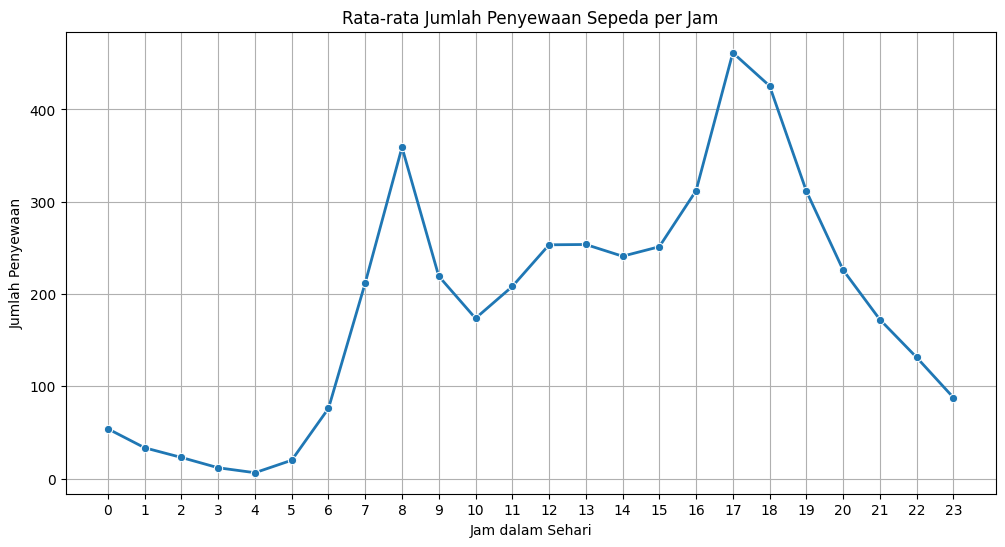

In [ ]:
hourly_rentals = df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o", linewidth=2)
plt.title("Rata-rata Jumlah Penyewaan Sepeda per Jam")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Pertanyaan 2:

<ipython-input-24-cdee7dffa0d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=df, palette="coolwarm")


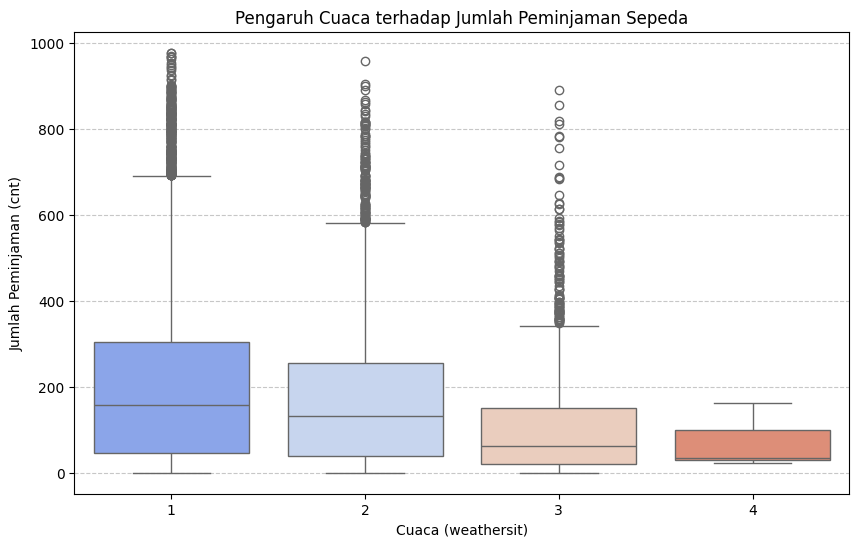

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=df, palette="coolwarm")
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda")
plt.xlabel("Cuaca (weathersit)")
plt.ylabel("Jumlah Peminjaman (cnt)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Pertanyaan 3:

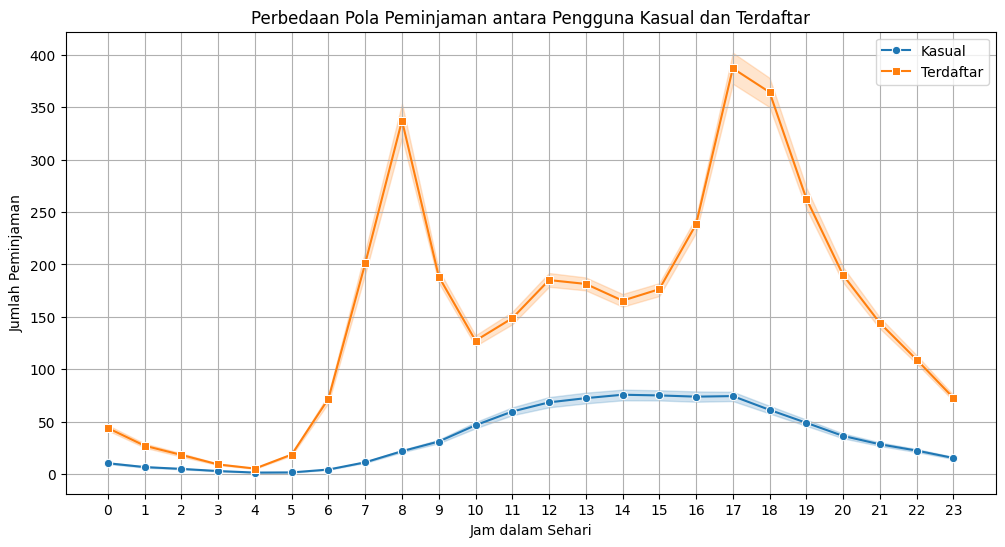

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['hr'], y=df['casual'], label='Kasual', marker="o")
sns.lineplot(x=df['hr'], y=df['registered'], label='Terdaftar', marker="s")
plt.title("Perbedaan Pola Peminjaman antara Pengguna Kasual dan Terdaftar")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Pengaruh Cuaca: Cuaca yang lebih baik cenderung meningkatkan jumlah peminjaman sepeda.
- Polanya per Jam: Pengguna kasual lebih banyak meminjam sepeda di akhir pekan, sedangkan pengguna terdaftar cenderung aktif di jam sibuk.
- Faktor Musiman: Musim tertentu memiliki dampak signifikan terhadap jumlah peminjaman, dengan lonjakan pada musim panas.
- Kondisi Lingkungan: Suhu, kelembaban, dan kecepatan angin mempengaruhi pola peminjaman.